In [9]:
!pip install tensorflow opencv-python matplotlib

In [10]:
import tensorflow as tf
import os

In [11]:
os.path.join('data','happy')

'data/happy'

In [12]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [13]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [14]:
data_dir = 'data'

In [15]:
image_exts = ['jpeg','jpg','bmp','png']

In [17]:
# for dodgy images
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)

    # Check if the item is a directory
    if os.path.isdir(class_path):
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                # Read the image using OpenCV
                img = cv2.imread(image_path)

                # Determine the file extension using imghdr
                tip = imghdr.what(image_path)

                # Check if the file extension is not in the allowed list
                if tip not in image_exts:
                    print('Image is not in the ext list: {}'.format(image_path))

                    # Remove the image file
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image: {}'.format(image_path))
    else:
        print('Skipping non-directory item: {}'.format(class_path))

libpng warning: iCCP: known incorrect sRGB profile


Skipping non-directory item: data/.DS_Store
Image is not in the ext list: data/sad/vector.svg
Image is not in the ext list: data/sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image is not in the ext list: data/sad/vector9.svg
Image is not in the ext list: data/sad/vector8.svg
Image is not in the ext list: data/sad/39681222.jpg
Image is not in the ext list: data/sad/depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image is not in the ext list: data/sad/very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg
Image is not in the ext list: data/sad/vector3.svg
Image is not in the ext list: data/sad/vector2.svg
Image is not in the ext list: data/sad/vector6.svg
Image is not in the ext list: data/sad/vector7.svg
Image is not in the ext list: data/sad/vector5.svg
Image is not in the ext list: data/sad/sad-quotes-62.webp
Image is not in the ext list: data/sad/vector4.svg
Image is not in the ext list: data/sad/

LOAD DATA USING KERAS UTILS

In [18]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [19]:
import numpy as np

In [20]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 308 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()

In [22]:
# Get another batch from the iterator
batch = data_iterator.next()

2023-11-20 22:24:52.461505: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [23]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

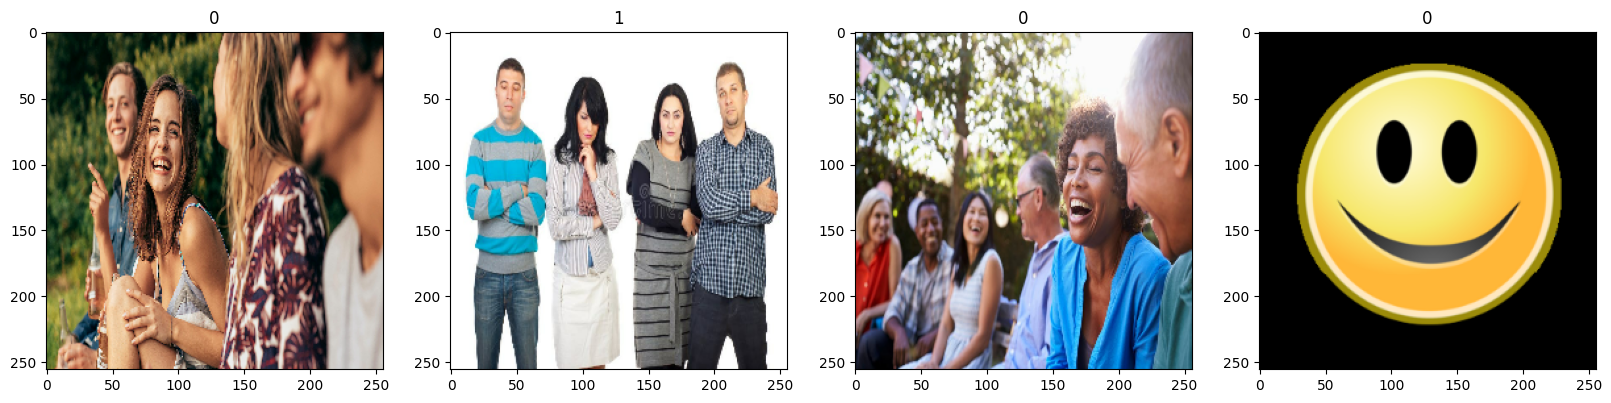

In [24]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

Preprocess Data

In [25]:
# Scale Data
data = data.map(lambda x,y:(x/255,y))

In [26]:
data.as_numpy_iterator().next()[0].min()

2023-11-20 22:24:57.069605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


0.0

In [27]:
# Split the data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).skip(val_size).take(test_size)

BUILD THE DEEP LEARNING MODEL

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16, (3,3), 1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [34]:
# Train
logdir= 'logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train,epochs=15,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/15


2023-11-20 22:25:01.044435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 1.0080 - accuracy: 0.4955

2023-11-20 22:25:08.153827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 11s 1s/step - loss: 1.0080 - accuracy: 0.4955 - val_loss: 0.6679 - val_accuracy: 0.7188
Epoch 2/15


2023-11-20 22:25:11.294185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.6432 - accuracy: 0.5893

2023-11-20 22:25:18.844875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 11s 1s/step - loss: 0.6432 - accuracy: 0.5893 - val_loss: 0.5824 - val_accuracy: 0.8281
Epoch 3/15


2023-11-20 22:25:21.832120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.5539 - accuracy: 0.7277

2023-11-20 22:25:28.986883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 10s 1s/step - loss: 0.5539 - accuracy: 0.7277 - val_loss: 0.4992 - val_accuracy: 0.7188
Epoch 4/15


2023-11-20 22:25:31.735315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.5007 - accuracy: 0.8080

2023-11-20 22:25:38.496911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 9s 1s/step - loss: 0.5007 - accuracy: 0.8080 - val_loss: 0.4415 - val_accuracy: 0.8438
Epoch 5/15


2023-11-20 22:25:41.140623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.4209 - accuracy: 0.8259

2023-11-20 22:25:49.135082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 11s 1s/step - loss: 0.4209 - accuracy: 0.8259 - val_loss: 0.3599 - val_accuracy: 0.9062
Epoch 6/15


2023-11-20 22:25:51.556832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.3320 - accuracy: 0.8661

2023-11-20 22:25:58.702939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 10s 1s/step - loss: 0.3320 - accuracy: 0.8661 - val_loss: 0.2496 - val_accuracy: 0.9219
Epoch 7/15


2023-11-20 22:26:01.387642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.3169 - accuracy: 0.8973

2023-11-20 22:26:07.868664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 9s 1s/step - loss: 0.3169 - accuracy: 0.8973 - val_loss: 0.2488 - val_accuracy: 0.8906
Epoch 8/15


2023-11-20 22:26:10.436221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.3027 - accuracy: 0.8795

2023-11-20 22:26:17.389423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 10s 1s/step - loss: 0.3027 - accuracy: 0.8795 - val_loss: 0.3115 - val_accuracy: 0.8750
Epoch 9/15


2023-11-20 22:26:20.133226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.2517 - accuracy: 0.9018

2023-11-20 22:26:27.219105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 10s 1s/step - loss: 0.2517 - accuracy: 0.9018 - val_loss: 0.1520 - val_accuracy: 0.9688
Epoch 10/15


2023-11-20 22:26:29.646024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.1887 - accuracy: 0.9286

2023-11-20 22:26:36.501256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 9s 1s/step - loss: 0.1887 - accuracy: 0.9286 - val_loss: 0.0965 - val_accuracy: 0.9531
Epoch 11/15


2023-11-20 22:26:39.299453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.1617 - accuracy: 0.9420

2023-11-20 22:26:47.061743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 11s 1s/step - loss: 0.1617 - accuracy: 0.9420 - val_loss: 0.1312 - val_accuracy: 0.9688
Epoch 12/15


2023-11-20 22:26:49.616548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.1502 - accuracy: 0.9464

2023-11-20 22:26:56.841405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 10s 1s/step - loss: 0.1502 - accuracy: 0.9464 - val_loss: 0.1035 - val_accuracy: 1.0000
Epoch 13/15


2023-11-20 22:26:59.541244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0892 - accuracy: 0.9821

2023-11-20 22:27:05.859995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 9s 998ms/step - loss: 0.0892 - accuracy: 0.9821 - val_loss: 0.0700 - val_accuracy: 0.9844
Epoch 14/15


2023-11-20 22:27:08.472301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.1061 - accuracy: 0.9688

2023-11-20 22:27:15.827242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 10s 1s/step - loss: 0.1061 - accuracy: 0.9688 - val_loss: 0.0533 - val_accuracy: 0.9844
Epoch 15/15


2023-11-20 22:27:20.382225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - ETA: 0s - loss: 0.0766 - accuracy: 0.9866

2023-11-20 22:27:30.656640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/7 [==============================] - 15s 2s/step - loss: 0.0766 - accuracy: 0.9866 - val_loss: 0.0879 - val_accuracy: 0.9844


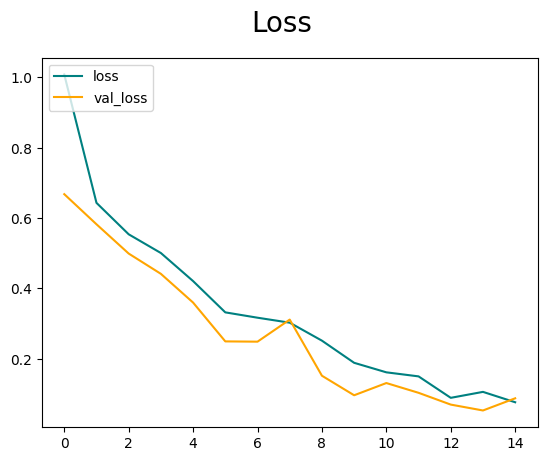

In [37]:
# Plotting Performance
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

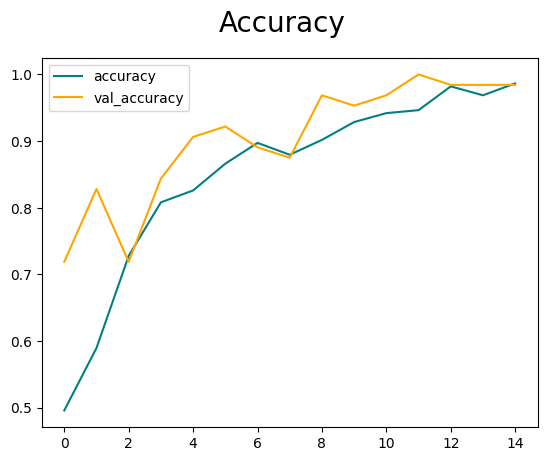

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

EVALUATING PERFORMANCE

In [39]:
# Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator():
  x, y = batch
  yhat = model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

2023-11-20 22:27:34.544224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 214ms/step


In [42]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


In [43]:
# Test
import cv2

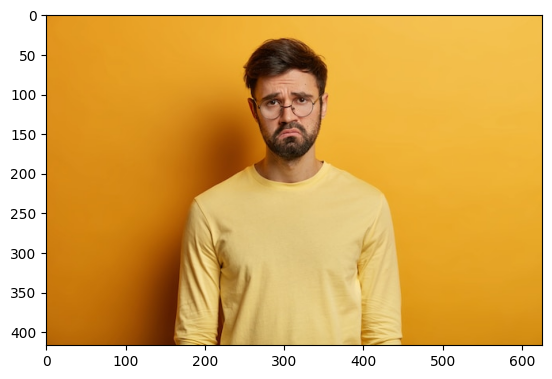

In [45]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

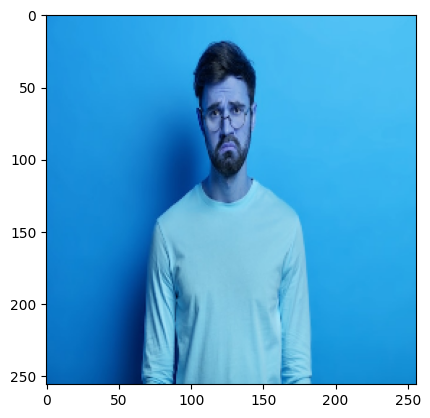

In [46]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 32ms/step


In [48]:
yhat

array([[0.72142947]], dtype=float32)

In [49]:
if yhat > 0.5:
  print(f'Predicted class is sad')
else:
  print(f'Predicted class is happy')

Predicted class is sad


SAVE THE MODEL

In [50]:
# save the model
from tensorflow.keras.models import load_model

In [51]:
model.save(os.path.join('models','happysadmodel.h5'))

/Users/harshmathur/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [53]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 123ms/step


In [54]:
if yhat_new > 0.5:
  print(f'Predicted class is sad')
else:
  print(f'Predicted class is happy')

Predicted class is sad


In [55]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

y_true = []
y_pred = []

for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)

    y_true.extend(y)
    y_pred.extend((yhat > 0.5).astype(int).flatten())

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

print(f'Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}')


2023-11-20 22:28:34.323791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 143ms/step
Precision: 1.0, Recall: 0.9166666666666666, Accuracy: 0.95


**USING SCIKIT LEARN AND RANDOMFOREST CLASSIFIER**

In [56]:
!pip install scikit-learn

IMPORTING ALL LIBRARIES

In [57]:
import os
import cv2
import imghdr
import numpy as np

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import joblib

DATA PRE_PROCESSING

In [59]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [60]:
X = []
y = []

In [75]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)

    # Check if the item is a directory
    if os.path.isdir(class_path):
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                # Read the image using OpenCV
                img = cv2.imread(image_path)
                # Determine the file extension using imghdr
                tip = imghdr.what(image_path)

                if tip in image_exts:
                    # Resize images to a fixed size (e.g., 256x256)
                    img_resized = cv2.resize(img, (256, 256))
                    # Flatten the image matrix to use as features
                    X.append(img_resized.flatten())
                    # Append the image class as the label
                    y.append(image_class)
            except Exception as e:
                print('Issue with image {}'.format(image_path))
    else:
        print('Skipping non-directory item: {}'.format(class_path))

Issue with image data/happy/images26.jpg
Issue with image data/happy/images32.jpg
Issue with image data/happy/05-12-21-happy-people.jpg
Issue with image data/happy/image22.jpeg
Issue with image data/happy/Happy.jpg
Issue with image data/happy/170404-happy-workers-feature.jpg
Issue with image data/happy/images33.jpg
Issue with image data/happy/images27.jpg
Issue with image data/happy/image18.jpeg
Issue with image data/happy/MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg
Issue with image data/happy/friends-happy-190821.jpg
Issue with image data/happy/images31.jpg
Issue with image data/happy/images25.jpg
Issue with image data/happy/images19.jpg
Issue with image data/happy/goup-happy-people-group-jumping-isolated-white-background-35582232.jpg
Issue with image data/happy/images18.jpg
Issue with image data/happy/images24.jpg
Issue with image data/happy/images30.jpg
Issue with image data/happy/image14.jpeg
Issue with image data/happy/image15.jpeg
Issue with image data/happy/young-and

libpng warning: iCCP: known incorrect sRGB profile


Issue with image data/happy/89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png
Issue with image data/happy/image17.jpeg
Issue with image data/happy/images16.jpg
Issue with image data/happy/goup-happy-people-35582464.jpg
Issue with image data/happy/images.jpg
Issue with image data/happy/happy-people.jpeg
Issue with image data/happy/image21.jpeg
Issue with image data/happy/happypeople-1024x679.jpg
Issue with image data/happy/ce529eea8c0ca9987656fa90474563d6.jpg
Issue with image data/happy/guilherme-stecanella-375176-unsplash.jpg
Issue with image data/happy/image3.jpeg
Issue with image data/happy/images17.jpg
Skipping non-directory item: data/.DS_Store
Issue with image data/sad/42-15542443.jpg
Issue with image data/sad/images26.jpg
Issue with image data/sad/images32.jpg
Issue with image data/sad/image22.jpeg
Issue with image data/sad/pngtree-woman-looking-sad-in-black-and-white-picture-image_2770858.jpg
Issue with image data/sad/thinking-people-sad-people-worried-people-

In [76]:
X = np.array(X)
y = np.array(y)

TRAINING THE MODEL

In [77]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [78]:
# Train the model
clf.fit(X_train, y_train)

# Evaluate on the test set
y_pred = clf.predict(X_test)

MEASURING THE PARAMETERS

In [79]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


SAVING THE MODEL

In [82]:
# Save the model
joblib.dump(clf, 'models/happysadmodel_rf.joblib')

# Load the model
loaded_model = joblib.load('models/happysadmodel_rf.joblib')

# Test on a new image
img_path = 'happytest.jpg'
img = cv2.imread(img_path)
img_resized = cv2.resize(img, (256, 256)).flatten()

PREDICTING THE DATASET

In [83]:
# Predict using the loaded model
prediction = loaded_model.predict([img_resized])

print(f'The predicted class is: {prediction[0]}')

The predicted class is: happy
